In [ ]:
#复习参考：https://zhuanlan.zhihu.com/p/338817680

In [161]:
#所有组件分布实现，测试

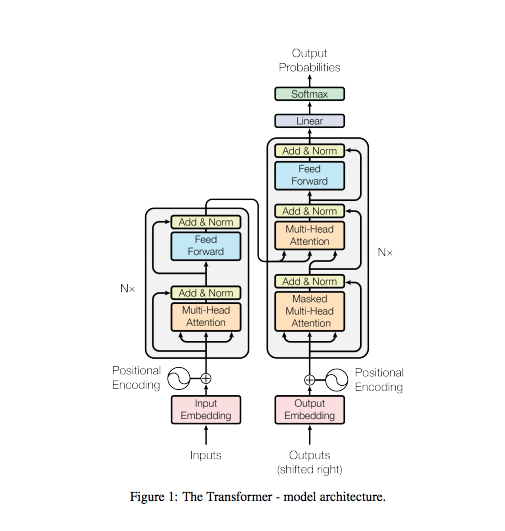

In [162]:
#embedding 层如何使用
import torch
import torch.nn as nn
vocal_szie = 10 #字典长度
d_depth = 512 #张量深度
embedding = nn.Embedding(vocal_szie, d_depth,padding_idx=0)
input = torch.LongTensor([[1,2,4,5],[4,3,2,9]])
output = embedding(input)

print(input.size())
print(output.size())

torch.Size([2, 4])
torch.Size([2, 4, 512])


In [163]:
#embedding 层实现
#embedding 功能为把数字字典转为密集向量
import torch
import torch.nn as nn
import math

class Embedding(nn.Module):
  def __init__(self, vocal_szie, d_model):#d_model:张量深度，vocal_szie：词汇表大小
    super(Embedding,self).__init__()
    self.lut = nn.Embedding(vocal_szie, d_model)#look up table
    self.d_model = d_model
  def forward(self, x):
    return self.lut(x) * math.sqrt(self.d_model)

x = torch.LongTensor([[1,2,4,5],[4,3,2,9]])
embed = Embedding(10,512)
embed = embed(x)
print(x.size())
print(embed.size())
print(x)
print(embed)

torch.Size([2, 4])
torch.Size([2, 4, 512])
tensor([[1, 2, 4, 5],
        [4, 3, 2, 9]])
tensor([[[ 18.9116, -28.0801,  15.2459,  ...,   2.3870,  27.1731,  -4.0762],
         [  3.4230, -18.9073,   0.5399,  ..., -24.7378,  35.3089, -30.5334],
         [ 29.4529,  10.6248,  -4.2968,  ..., -22.5453,  10.1139,  14.3543],
         [ 18.8828, -20.8197, -24.0989,  ...,  31.2493, -22.1008, -10.8993]],

        [[ 29.4529,  10.6248,  -4.2968,  ..., -22.5453,  10.1139,  14.3543],
         [ -1.0598,  34.2300,  -6.2481,  ...,  -3.1028, -30.4252, -10.7411],
         [  3.4230, -18.9073,   0.5399,  ..., -24.7378,  35.3089, -30.5334],
         [-20.4622,   6.5292, -18.7831,  ..., -25.6516, -11.0359,  17.1581]]],
       grad_fn=<MulBackward0>)


In [164]:
#loactionEncoding 一些方法用法
import torch
import torch.nn as nn

m = nn.Dropout(p=0.2)#随机关闭一些神经元
input = torch.randn(4, 5)
output = m(input)

x = torch.tensor([1,2,3,4])
y = torch.unsqueeze(x,0)#添加维度
z = torch.unsqueeze(x,1)
print(x.size())
print(y.size())
print(z.size())

torch.Size([4])
torch.Size([1, 4])
torch.Size([4, 1])


In [165]:
#locationEncoding 实现
#locationEncoding 功能是把词向量和位置编码绑在一起
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt

class LocationEncoding(nn.Module):
  def __init__(self, d_depth, dropout, max_len=5000): #d_depth是张量维度，dropout是丢弃率，max_len是句子最大长度
    super(LocationEncoding, self).__init__()
    self.dropout = nn.Dropout(p=dropout)
    pe = torch.zeros(max_len, d_depth)
    position = torch.arange(0, max_len).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_depth, 2) * -(math.log(10000.0) / d_depth))
    pe[:, 0::2] = torch.sin(position * div_term)#处理好的位置矩阵覆盖空矩阵
    pe[:, 1::2] = torch.cos(position * div_term)
    pe = pe.unsqueeze(0)
    self.register_buffer('pe', pe)
  def forward(self, x):
    x = x + self.pe[:, :x.size(1)].requires_grad_(False) #x不需要计算梯度
    return self.dropout(x)

d_depth = 512
dropout = 0.2
max_len = 60

x = embed#embedding 操作后的值
pe = LocationEncoding(d_depth, dropout, max_len)
pe_result = pe(x)
print(pe_result.size())
print(pe_result)


torch.Size([2, 4, 512])
tensor([[[ 23.6395, -33.8501,  19.0574,  ...,   4.2338,  33.9663,  -3.8453],
         [  5.3306, -22.9587,   1.7022,  ..., -29.6722,  44.1363, -36.9168],
         [ 37.9527,  12.7609,  -4.2005,  ..., -26.9316,  12.6426,   0.0000],
         [ 23.7799, -27.2621, -29.8172,  ...,  40.3117, -27.6256, -12.3742]],

        [[  0.0000,  14.5310,  -5.3710,  ..., -26.9316,  12.6423,  19.1929],
         [ -0.2729,  43.4629,  -6.7828,  ...,  -0.0000, -38.0313, -12.1764],
         [  5.4154, -24.1543,   1.8454,  ..., -29.6722,  44.1364, -36.9168],
         [-25.4014,   6.9240, -23.1726,  ...,  -0.0000, -13.7944,   0.0000]]],
       grad_fn=<MulBackward0>)


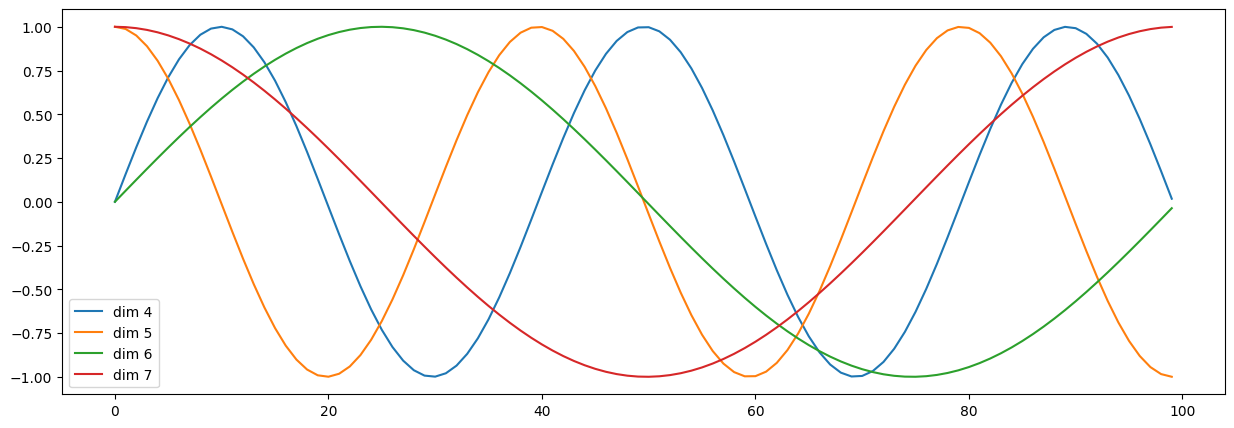

In [166]:
#locationEncoding简单可视化
import matplotlib.pyplot as plt
import torch
import numpy as np

# 创建画布
plt.figure(figsize=(15, 5))

# 实例化LocationEncoding类，参数：d_depth=20, dropout=0, max_len=100
pe = LocationEncoding(20, 0, 100)

# 创建输入张量并获取位置编码
y = pe(torch.zeros(1, 100, 20))

# 绘制位置编码的某些维度
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())

# 添加图例
plt.legend(["dim %d"%p for p in [4,5,6,7]])
plt.show()

tensor([[[1, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 0, 0],
         [1, 1, 1, 0, 0, 0],
         [1, 1, 1, 1, 0, 0],
         [1, 1, 1, 1, 1, 0],
         [1, 1, 1, 1, 1, 1]]], dtype=torch.uint8)
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

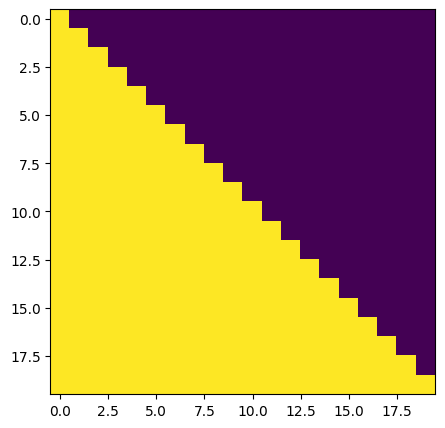

In [167]:
#encoding部分方法：掩码张量
#掩码张量可以设置1和0，来选择是否遮掩
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

def subsequence_mask(size):#掩码张量后两个维度形成一个方阵
    return torch.tril(torch.ones(1, size, size, dtype=torch.uint8))

size = 6
sm = subsequence_mask(size)
print(sm)

fig = plt.figure(figsize=(5, 5))
a = subsequence_mask(20)[0].numpy()#3维无法显示，降到2维后显示
print(a)
plt.imshow(a)

In [168]:
#Attention部分
import torch
import torch.nn as nn

x = torch.randn(5,5)
mask = torch.zeros(5,5)
y = x.masked_fill(mask == 0, -1e9)
print(y)

tensor([[-1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09]])


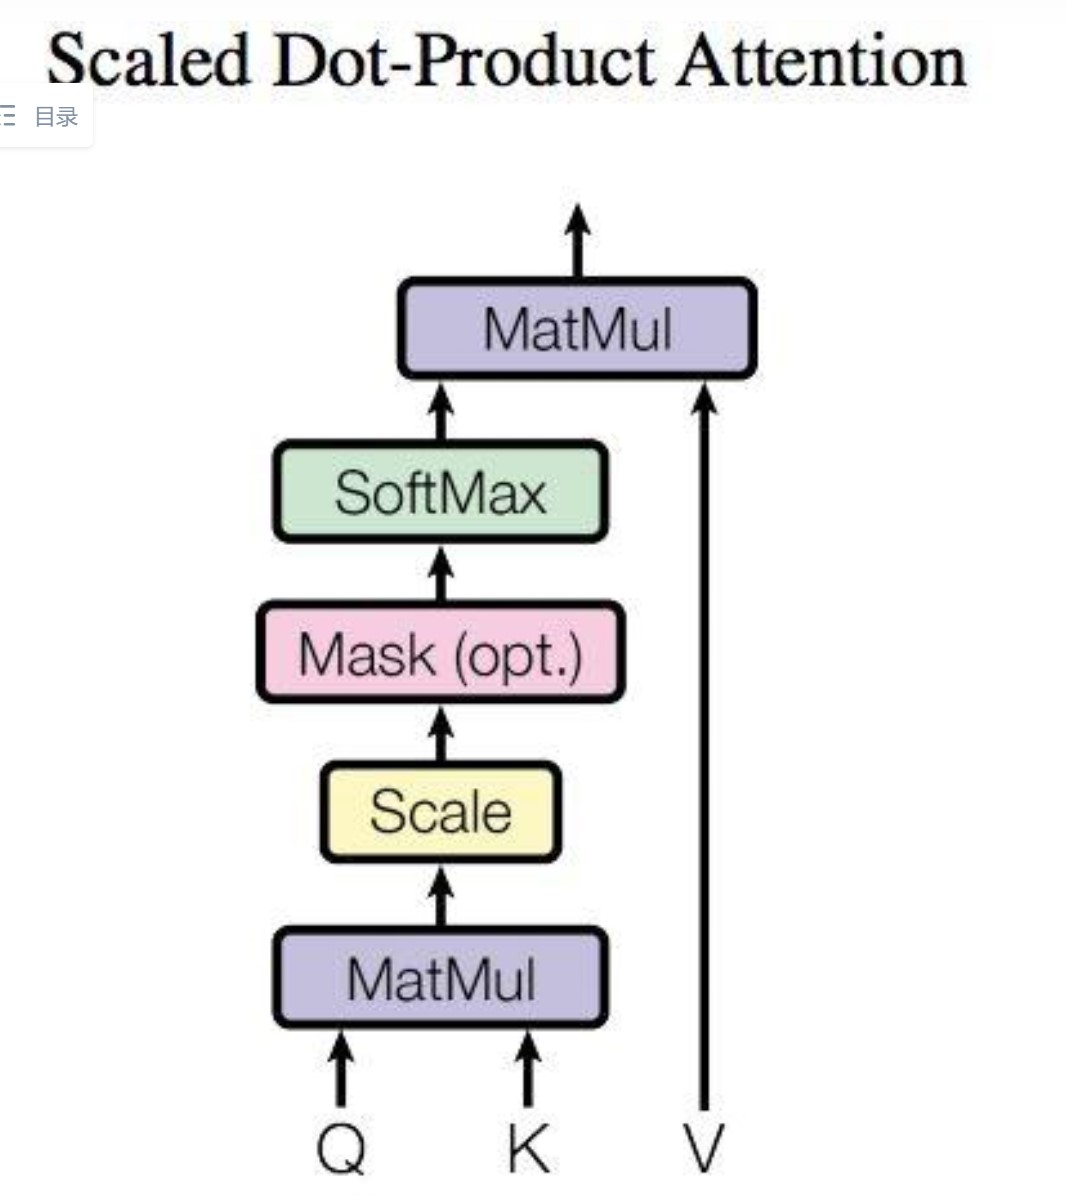

In [169]:
#Attention方法实现部分
#当Q,K,V三个参数相等时编程self_Attention(自注意力机制)
import torch
import torch.nn as nn
import math

def attention(query, key, value, mask=None, dropout=None):#Query,key,Value:注意力机制最重要的3个参数
  d_k = query.size(-1)
  #按照注意力公式编写实现代码
  scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)

  if mask is not None:
    scores = scores.masked_fill(mask == 0, -1e9)#掩码判定为0时，替换为-1e9

  p_attn = scores.softmax(dim=-1)

  if dropout is not None:
    p_attn = dropout(p_attn)#如果有dropout参数使用

  return torch.matmul(p_attn,value),p_attn

query = key = value = pe_result
mask = torch.zeros(2,4,4)
attn,p_attn = attention(query, key, value,mask=mask)
print(attn)
print(attn.size())
print(p_attn)
print(p_attn.size())

tensor([[[ 22.6757, -17.8275,  -3.3145,  ...,  -3.0146,  15.7799, -13.2841],
         [ 22.6757, -17.8275,  -3.3145,  ...,  -3.0146,  15.7799, -13.2841],
         [ 22.6757, -17.8275,  -3.3145,  ...,  -3.0146,  15.7799, -13.2841],
         [ 22.6757, -17.8275,  -3.3145,  ...,  -3.0146,  15.7799, -13.2841]],

        [[ -5.0647,  10.1909,  -8.3703,  ..., -14.1510,   1.2382,  -7.4751],
         [ -5.0647,  10.1909,  -8.3703,  ..., -14.1510,   1.2382,  -7.4751],
         [ -5.0647,  10.1909,  -8.3703,  ..., -14.1510,   1.2382,  -7.4751],
         [ -5.0647,  10.1909,  -8.3703,  ..., -14.1510,   1.2382,  -7.4751]]],
       grad_fn=<UnsafeViewBackward0>)
torch.Size([2, 4, 512])
tensor([[[0.2500, 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500, 0.2500, 0.2500]],

        [[0.2500, 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500, 0.2500, 0.2500],
         [0.2500, 0.2500, 0.2500, 0.2500],
         [0.250

In [170]:
#multihead_Attentions多头注意力实现
#多头注意力把输入分成多个部分，让每个部分独立学习不同的注意力模式，最后把结果拼接起来。
import copy
import torch.nn as nn

def clones(module, N):#克隆函数用于多头注意力层的多结构相同线形层
    return nn.ModuleList([copy.deepcopy(module) for _ in range(N)])

class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads, embed_dim, dropout=0.1):#num_heads：头数，embed_dim：向量深度，dropout：丢弃比例
        super(MultiHeadAttention, self).__init__()
        assert embed_dim % num_heads == 0 #输入维度必须能被头数整除，否则无法有效分配维度给每个头，设置为直接报错
        self.d_k = embed_dim // num_heads
        self.num_heads = num_heads
        # 前三层做 Q、K、V 的线性映射，第四层做输出映射
        self.linears = clones(nn.Linear(embed_dim, embed_dim), 4)
        self.dropout = nn.Dropout(p=dropout)
        self.attn = None

    def forward(self, query, key, value, mask=None):
        if mask is not None:
            # 增加维度
            mask = mask.unsqueeze(1)
        batch_size = query.size(0)  # 只获取batch_size，不获取seq_len

        # Q、K、V 三次线性映射 + 拆分多头
        query, key, value = [
            lin(x).view(batch_size, -1, self.num_heads, self.d_k)
                 .transpose(1, 2)  # -> [B, H, L, d_k]
            for lin, x in zip(self.linears[:3], (query, key, value))
        ]

        # 计算注意力
        x, self.attn = attention(query, key, value, mask=mask, dropout=self.dropout)
        # 合并多头
        x = x.transpose(1, 2).contiguous().view(batch_size, -1, self.num_heads * self.d_k)
        # 输出映射
        return self.linears[3](x)

head = 8
embed = 512
dropout = 0.2
query = key = value = pe_result
mask = torch.zeros(2,4,4)

mha = MultiHeadAttention(head,embed,dropout)
out = mha(query, key, value, mask=mask)
print(out)
print(out.size())

tensor([[[ -1.5956,   1.1906,   3.5785,  ...,  -5.4662,  -1.7865,  -1.9917],
         [ -0.0706,   4.1207,   5.2019,  ..., -11.3631,  -2.9584,  -2.8257],
         [ -0.9627,   2.0533,   4.1804,  ...,  -6.5540,   0.3695,  -3.3616],
         [  0.8307,  -0.2166,   3.2098,  ...,  -4.1794,   0.5363,  -6.0589]],

        [[  0.3131,  -2.4417,   8.5292,  ...,   1.6497,   1.3277,  -4.9427],
         [ -2.2764,   0.4659,   7.9203,  ...,   0.9753,   3.0244,  -4.3671],
         [ -1.0409,   1.8737,   9.6220,  ...,  -0.6720,  -0.0744,  -1.5663],
         [  0.4106,   1.6292,   7.4699,  ...,  -1.0942,   3.7690,  -0.0311]]],
       grad_fn=<ViewBackward0>)
torch.Size([2, 4, 512])


In [171]:
#前馈全连接层实现
#前馈全连接层用于接收注意力层的输出，有两层线性层增加拟合
import torch
import torch.nn as nn

class PositionwiseFeedForward(nn.Module):
  def __init__(self, d_model, d_ff, dropout=0.1): #d_model是线性层输入维度，d_ff为线性层输出维度
    super(PositionwiseFeedForward, self).__init__()
    self.w1 = nn.Linear(d_model, d_ff)
    self.w2 = nn.Linear(d_ff, d_model)
    self.dropout = nn.Dropout(dropout)

  def forward(self, x):
    return self.w2(self.dropout(self.w1(x).relu()))

x = out
ff = PositionwiseFeedForward(512,64)
ff_result = ff(x)
print(x)
print(x.size())
print(ff_result)
print(ff_result.size())


tensor([[[ -1.5956,   1.1906,   3.5785,  ...,  -5.4662,  -1.7865,  -1.9917],
         [ -0.0706,   4.1207,   5.2019,  ..., -11.3631,  -2.9584,  -2.8257],
         [ -0.9627,   2.0533,   4.1804,  ...,  -6.5540,   0.3695,  -3.3616],
         [  0.8307,  -0.2166,   3.2098,  ...,  -4.1794,   0.5363,  -6.0589]],

        [[  0.3131,  -2.4417,   8.5292,  ...,   1.6497,   1.3277,  -4.9427],
         [ -2.2764,   0.4659,   7.9203,  ...,   0.9753,   3.0244,  -4.3671],
         [ -1.0409,   1.8737,   9.6220,  ...,  -0.6720,  -0.0744,  -1.5663],
         [  0.4106,   1.6292,   7.4699,  ...,  -1.0942,   3.7690,  -0.0311]]],
       grad_fn=<ViewBackward0>)
torch.Size([2, 4, 512])
tensor([[[-1.9780,  1.9375,  0.7866,  ...,  0.8677,  0.7454,  0.7189],
         [-2.1161,  0.8857,  1.4598,  ...,  0.0163, -0.1391,  0.0996],
         [-1.7593, -0.0138,  1.6266,  ...,  0.3349,  0.3783,  0.5869],
         [-1.8524,  1.2189,  2.1691,  ...,  1.3130, -0.0659,  0.5594]],

        [[-2.0409,  2.7009,  0.3787,  

In [172]:
#规范化层实现（也叫归一化层）
#减少偏移量，然后数据不那么敏感
import torch
import torch.nn as nn

class LayerNorm(nn.Module):
  def __init__(self,features,eps=1e-6):#features是词嵌入维度，esp是足够小的数无法被识别（mask有相关逻辑）
    super(LayerNorm,self).__init__()
    self.a2 = nn.Parameter(torch.ones(features))
    self.b2 = nn.Parameter(torch.zeros(features))
    self.eps = eps
  def forward(self,x):
    mean = x.mean(-1,keepdim=True)#keepdim：保持输出输入一致
    std = x.std(-1,keepdim=True)
    return self.a2 * (x - mean) / (std + self.eps) + self.b2 #按照归一化公式计算

features = 512
x = ff_result

ln = LayerNorm(features)
ln_result = ln(x)
print(x)
print(x.size())
print(ln_result)
print(ln_result.size())


tensor([[[-1.9780,  1.9375,  0.7866,  ...,  0.8677,  0.7454,  0.7189],
         [-2.1161,  0.8857,  1.4598,  ...,  0.0163, -0.1391,  0.0996],
         [-1.7593, -0.0138,  1.6266,  ...,  0.3349,  0.3783,  0.5869],
         [-1.8524,  1.2189,  2.1691,  ...,  1.3130, -0.0659,  0.5594]],

        [[-2.0409,  2.7009,  0.3787,  ...,  0.9468, -0.8017,  0.2247],
         [-1.8385,  3.1664,  0.8961,  ...,  0.7207,  0.0071, -0.7414],
         [-1.7767,  2.9078, -0.3899,  ...,  0.5363, -0.8132,  0.4439],
         [-1.6058,  3.6021, -0.9722,  ...,  0.3280, -0.8166, -0.1671]]],
       grad_fn=<ViewBackward0>)
torch.Size([2, 4, 512])
tensor([[[-1.5500,  1.6380,  0.7010,  ...,  0.7670,  0.6674,  0.6458],
         [-1.2872,  0.7109,  1.0930,  ...,  0.1321,  0.0287,  0.1876],
         [-1.1834,  0.0919,  1.2905,  ...,  0.3467,  0.3784,  0.5308],
         [-1.3317,  1.0530,  1.7908,  ...,  1.1260,  0.0554,  0.5409]],

        [[-1.2764,  1.8727,  0.3305,  ...,  0.7078, -0.4534,  0.2283],
         [-1.19

In [173]:
#子层连接结构实现
#子层连接结构包括残差连接 + Layer Norm + Dropout
import torch
import torch.nn as nn

class SubLayerConnection(nn.Module):
  def __init__(self,size,dropout):#size:词嵌入维度
    super(SubLayerConnection,self).__init__()
    self.norm = LayerNorm(size)
    self.dropout = nn.Dropout(dropout)
    self.size = size

  def forward(self,x,sublayer):#sublayer:
    return x + self.dropout(sublayer(self.norm(x)))

size = d_module = 512
head = 8
dropout = 0.2

x = pe_result
mask = torch.zeros(2,4,4)
self_attn = MultiHeadAttention(head,d_module)
#定义子层操作
sublayer = lambda x: self_attn(x, x, x, mask)

#应用子层连接（残差连接 + Layer Norm + Dropout）
sc = SubLayerConnection(size, dropout)
sc_result = sc(x, sublayer)
print(sc_result)
print(sc_result.size())

tensor([[[ 23.6062, -33.5206,  19.0574,  ...,   4.2911,  33.6439,  -3.9149],
         [  5.2771, -22.9587,   1.6223,  ..., -29.6722,  43.7528, -36.9267],
         [ 37.8141,  13.1615,  -4.4452,  ..., -26.9073,  12.3039,   0.0000],
         [ 23.7417, -26.9637, -30.1231,  ...,  40.3593, -27.9013, -12.4563]],

        [[  0.1801,  14.4358,  -5.3010,  ..., -27.0489,  12.7683,  19.2453],
         [ -0.2729,  43.4042,  -6.8851,  ...,  -0.1559, -37.8661, -12.3511],
         [  5.5585, -24.3342,   2.0117,  ..., -29.8882,  44.2766, -36.9168],
         [-25.4540,   6.7953, -23.0732,  ...,  -0.1765, -13.6987,  -0.0961]]],
       grad_fn=<AddBackward0>)
torch.Size([2, 4, 512])


In [174]:
#Encoding layer（编码器层实现）
#编码器组成单元
import torch
import torch.nn as nn

class Encoder_layer(nn.Module):
  def __init__(self,size,self_attn,feed_forward,dropout):#size:词嵌入大小，self_attn：来自多头注意力层的实例化对象，feed_forward：前馈全连接层实例化对象
    super(Encoder_layer,self).__init__()
    self.self_attn = self_attn
    self.feed_forward = feed_forward
    self.size = size
    self.sublayer = clones(SubLayerConnection(size,dropout),2)
  def forward(self,x,mask):
    x = self.sublayer[0](x,lambda x:self.self_attn(x,x,x,mask))
    return self.sublayer[1](x,self.feed_forward)

size = d_module = 512
head = 8
d_ff = 64
x = pe_result
dropout = 0.2

self_attn = MultiHeadAttention(head,d_module)
feed_forward = PositionwiseFeedForward(d_module,d_ff,dropout)
mask = torch.zeros(2,4,4)

el = Encoder_layer(size,self_attn,feed_forward,dropout)
el_result = el(x,mask)
print(el_result)
print(el_result.size())



tensor([[[ 23.0598, -33.9068,  19.2228,  ...,   4.0476,  34.1419,  -3.7818],
         [  4.7965, -23.1244,   1.9405,  ..., -29.9361,  44.3162, -36.9974],
         [ 36.8482,  13.6033,  -3.7250,  ..., -26.7826,  12.4146,  -0.2242],
         [ 23.2928, -26.7625, -29.6173,  ...,  39.7150, -27.6144, -13.1113]],

        [[ -0.3142,  14.3752,  -4.6396,  ..., -26.7381,  12.9279,  18.4783],
         [ -0.4388,  43.5549,  -6.7828,  ...,   0.3391, -37.9821, -12.5408],
         [  5.2579, -24.0940,   1.8454,  ..., -29.5005,  44.7623, -37.2827],
         [-26.2177,   7.4910, -23.1060,  ...,   0.1596, -13.8413,  -0.2929]]],
       grad_fn=<AddBackward0>)
torch.Size([2, 4, 512])


In [175]:
#编码器实现
#编码器为N个编码器层的堆叠
import torch
import torch.nn as nn

class Encoder(nn.Module):
  def __init__(self,layer,N):#layer:，编码器层，N：编码层数量
    super(Encoder,self).__init__()
    self.layers = clones(layer,N)
    self.norm = LayerNorm(layer.size)
  def forward(self,x,mask):
    for layer in self.layers:
      x = layer(x,mask) #编码器层的输出作为下一层的输入
    return self.norm(x)

size = 512
head = 8
d_model = 512
d_ff = 64
c = copy.deepcopy
x = pe_result
attn = MultiHeadAttention(head, d_model)
ff = PositionwiseFeedForward(d_model, d_ff, dropout)
dropout = 0.2
layer = Encoder_layer(size, c(attn), c(ff), dropout)

# 编码器中编码器层的个数N
N = 8
mask = torch.zeros(2, 4, 4)

en = Encoder(layer,N) # en是Encoder方法
en_result = en(x,mask) #en_result为Encoder输出
print(x)
print(x.size())
print(en_result)
print(en_result.size())

tensor([[[ 23.6395, -33.8501,  19.0574,  ...,   4.2338,  33.9663,  -3.8453],
         [  5.3306, -22.9587,   1.7022,  ..., -29.6722,  44.1363, -36.9168],
         [ 37.9527,  12.7609,  -4.2005,  ..., -26.9316,  12.6426,   0.0000],
         [ 23.7799, -27.2621, -29.8172,  ...,  40.3117, -27.6256, -12.3742]],

        [[  0.0000,  14.5310,  -5.3710,  ..., -26.9316,  12.6423,  19.1929],
         [ -0.2729,  43.4629,  -6.7828,  ...,  -0.0000, -38.0313, -12.1764],
         [  5.4154, -24.1543,   1.8454,  ..., -29.6722,  44.1364, -36.9168],
         [-25.4014,   6.9240, -23.1726,  ...,  -0.0000, -13.7944,   0.0000]]],
       grad_fn=<MulBackward0>)
torch.Size([2, 4, 512])
tensor([[[ 0.7591, -1.3910,  0.8269,  ...,  0.0573,  1.4041, -0.0774],
         [ 0.0670, -1.0031,  0.2252,  ..., -1.4294,  1.7600, -1.3748],
         [ 1.3426,  0.4269, -0.1399,  ..., -0.9241,  0.5571,  0.0929],
         [ 1.0127, -1.0117, -0.9653,  ...,  1.6234, -1.0392, -0.2380]],

        [[-0.1539,  0.5219, -0.1196,  .

In [176]:
#解码器层实现
#实现了解码器层的三个组件并输出
import torch
import torch.nn as nn

class Decoder_layer(nn.Module):
  def __init__(self,size,self_attn,src_attn,feed_forward,dropout):#size:词嵌入大小，self_attn：来自多头注意力层的实例化对象，src_attn:多头注意力对象，feed_forward：前馈全连接层实例化对象
    super(Decoder_layer,self).__init__()
    self.self_attn = self_attn
    self.src_attn = src_attn
    self.feed_forward = feed_forward
    self.size = size
    self.sublayer = clones(SubLayerConnection(size,dropout),3)
  def forward(self,x,memory,source_mask,target_mask):
    m = memory
    x = self.sublayer[0](x,lambda x:self.self_attn(x,x,x,target_mask))
    x = self.sublayer[1](x,lambda x:self.src_attn(x,m,m,source_mask))
    return self.sublayer[2](x,self.feed_forward)

#用编码器层一样的数据测试
size = d_module = 512
head = 8
d_ff = 64
x = pe_result
dropout = 0.2

self_attn = MultiHeadAttention(head,d_module)
src_attn = MultiHeadAttention(head,d_module)
feed_forward = PositionwiseFeedForward(d_module,d_ff,dropout)

memory = en_result #Encoder 输出作为memory参数
source_mask = torch.zeros(2,4,4)
target_mask = torch.zeros(2,4,4)

de = Decoder_layer(size,self_attn,src_attn,feed_forward,dropout)
de_result = de(x,memory,source_mask,target_mask) #memory作为编码器输入进入解码器
print(de_result)
print(de_result.size())

tensor([[[ 23.6195, -34.3034,  18.7666,  ...,   4.8282,  33.9009,  -4.0353],
         [  5.0559, -23.2141,   1.7124,  ..., -29.2725,  43.4773, -37.3916],
         [ 38.4053,  12.0903,  -4.6512,  ..., -26.4825,  12.6919,   0.0711],
         [ 23.9412, -28.0411, -29.7810,  ...,  40.7099, -27.5649, -12.2664]],

        [[  0.4048,  14.6052,  -5.6286,  ..., -27.3462,  12.7639,  19.7301],
         [  0.2249,  43.7268,  -6.8722,  ...,  -0.2051, -37.4119, -12.3211],
         [  5.3235, -24.1690,   1.3720,  ..., -29.6420,  44.5193, -36.9562],
         [-25.2272,   6.8885, -23.7450,  ...,   0.3371, -14.1028,   0.5530]]],
       grad_fn=<AddBackward0>)
torch.Size([2, 4, 512])


In [177]:
#解码器实现
#N个解码器层一起工作实现
import torch
import torch.nn as nn

class Decoder(nn.Module):
  def __init__(self,layer,N):#layer:，解码器层，N：解码器层数量
    super(Decoder,self).__init__()
    self.layers = clones(layer,N)
    self.norm = LayerNorm(layer.size)
  def forward(self,x,memory,source_mask,target_mask):
    for layer in self.layers:
      x = layer(x,memory,source_mask,target_mask) #解码器层的输出作为下一层的输入
    return self.norm(x)

# 分别是解码器layer和解码器的个数N
size = 512
d_model = 512
head = 8
d_ff = 64
dropout = 0.2
c = copy.deepcopy

attn = MultiHeadAttention(head, d_model)
ff = PositionwiseFeedForward(d_model, d_ff, dropout)
layer = Decoder_layer(d_model, c(attn), c(attn), c(ff), dropout)
N = 8

x = pe_result
memory = en_result
mask = torch.zeros(2,4,4)
source_mask = target_mask = mask

de = Decoder(layer,N) # de = Docker()
de_result = de(x,memory,source_mask,target_mask)
print(de_result)
print(de_result.size())

tensor([[[ 0.9767, -1.4878,  0.4827,  ..., -0.0459,  1.1199, -0.2344],
         [ 0.2395, -0.9055, -0.1318,  ..., -1.2843,  1.5551, -1.4928],
         [ 1.4459,  0.3964, -0.3977,  ..., -1.1388,  0.3094, -0.0842],
         [ 0.9661, -1.1094, -1.2996,  ...,  1.4945, -1.1212, -0.4754]],

        [[ 0.0537,  0.2726, -0.2736,  ..., -1.0589,  0.3117,  0.6432],
         [-0.0346,  1.4564, -0.4585,  ..., -0.1432, -1.6963, -0.4514],
         [ 0.2926, -1.1611, -0.0565,  ..., -1.2587,  1.5696, -1.5494],
         [-0.8144,  0.1845, -0.8861,  ..., -0.0629, -0.6802, -0.0482]]],
       grad_fn=<AddBackward0>)
torch.Size([2, 4, 512])


In [178]:
#输出部分实现

import torch
import torch.nn as nn
import torch.nn.functional as F

class Generator(nn.Module):
  def __init__(self,d_model,vocab):#d_model:词嵌入维度，vocab：词表大小
    super(Generator,self).__init__()
    self.proj = nn.Linear(d_model,vocab)
  def forward(self,x):
    return F.log_softmax(self.proj(x),dim=-1)


# 实例化参数:
d_model = 512
# 词表大小1000
vocab_size = 1000
# 输入x是上一层网络的输出，我们使用来自解码器层的输出
x = de_result

gen = Generator(d_model,vocab_size)
gen_result = gen(x)
print(gen_result)
print(gen_result.size())

tensor([[[-6.8711, -7.1358, -6.6212,  ..., -7.5028, -7.3820, -6.5884],
         [-6.3520, -8.2288, -7.0016,  ..., -6.4399, -6.4940, -6.8541],
         [-6.8969, -6.3281, -6.7251,  ..., -6.9086, -6.5271, -7.3277],
         [-8.2126, -7.0068, -6.5633,  ..., -7.5642, -7.3063, -7.3724]],

        [[-7.3027, -6.2367, -7.0893,  ..., -6.8154, -6.0125, -7.5050],
         [-7.9292, -6.4222, -8.0474,  ..., -7.0190, -7.7309, -7.1373],
         [-6.5411, -7.4815, -7.1933,  ..., -6.6164, -6.5341, -6.8462],
         [-6.4254, -6.1874, -7.0748,  ..., -8.2349, -7.2391, -6.6861]]],
       grad_fn=<LogSoftmaxBackward0>)
torch.Size([2, 4, 1000])


In [185]:
#完整Encoder_Decoder类构建实现

import torch
import torch.nn as nn

class EncoderDecoder(nn.Module):
  def __init__(self,encoder,decoder,source_embed,target_embed,generator):#依次为编解码器对象，源和目标嵌入函数，输出部分类别生成器
    super(EncoderDecoder,self).__init__()
    self.encoder = encoder
    self.decoder = decoder
    self.src_embed = source_embed
    self.tgt_embed = target_embed
    self.generator = generator

  def forward(self,source,target,source_mask,target_mask):#依次为源和目标数据，源和目标掩码
    x = self.decode(self.encode(source,source_mask),source_mask,target,target_mask)#编码器的输出会作为解码器的输入memory
    #x = self.generator(x)
    return x

  def encode(self,source,source_mask):
    return self.encoder(self.src_embed(source),source_mask)

  def decode(self,memory,source_mask,target,target_mask):
    return self.decoder(self.tgt_embed(target),memory,source_mask,target_mask)

vocab_size = 1000
encoder = en
decoder = de
source_embed = nn.Embedding(vocab_size,d_model)
target_embed = nn.Embedding(vocab_size,d_model)
generator = gen

source = target = torch.LongTensor([[100, 2, 421, 508], [491, 998, 1, 221]])
source_mask = target_mask = torch.zeros(2, 4, 4)

ed = EncoderDecoder(encoder,decoder,source_embed,target_embed,generator) #ed为传入参数的EncoderDecoder（）
ed_result = ed(source,target,source_mask,target_mask)
print(ed_result)
print(de_result.size())

tensor([[[-0.9642,  0.6716,  0.3810,  ..., -1.5974, -0.6170, -0.5636],
         [-1.7583,  1.0172, -1.1298,  ..., -1.0278, -0.2414, -0.3731],
         [-1.4088, -0.4851, -0.5217,  ..., -0.7390, -0.0346,  1.0022],
         [-0.4813,  0.7224, -0.3636,  ..., -1.0517, -1.0577,  0.5599]],

        [[ 0.7682, -0.3951, -1.2678,  ...,  0.5668, -1.2040, -0.0885],
         [-0.0940, -0.7712, -0.4251,  ..., -0.2597, -2.3253, -0.0368],
         [ 0.9347,  0.1726, -1.4624,  ..., -0.4756, -2.5735,  0.1768],
         [-0.2516, -0.1091, -1.1992,  ..., -0.5987, -0.6741, -0.5723]]],
       grad_fn=<AddBackward0>)
torch.Size([2, 4, 512])


In [180]:
#transformer完整实现方法
import torch
import torch.nn as nn
import copy
#组合所有类和方法实现transformer模型

def make_model(source_vocab,target_vocab,N=6,d_model=512,d_ff=2048,head=8,dropout=0.1):
  c = copy.deepcopy
  attn = MultiHeadAttention(head,d_model)
  ff = PositionwiseFeedForward(d_model,d_ff,dropout)
  position = LocationEncoding(d_model,dropout)

  #调用对应组件class获取对应对象
  encoder = Encoder(Encoder_layer(d_model,c(attn),c(ff),dropout),N)
  decoder = Decoder(Decoder_layer(d_model,c(attn),c(attn),c(ff),dropout),N)
  source_embed = nn.Sequential(Embedding(source_vocab,d_model),c(position))
  target_embed = nn.Sequential(Embedding(target_vocab,d_model),c(position))
  generator = Generator(d_model,target_vocab)

  transformer_model = EncoderDecoder(encoder=encoder,decoder=decoder,source_embed=source_embed,target_embed=target_embed,generator=generator)

  for p in transformer_model.parameters():#初始化模型参数，如果大于1初始化成均匀分布矩阵
    if p.dim() > 1:
      nn.init.xavier_uniform_(p)

  return transformer_model

source_vocab = 11
target_vocab = 11
N = 6

if __name__ == '__main__':
  result = make_model(source_vocab,target_vocab,N)
  print(result)


EncoderDecoder(
  (encoder): Encoder(
    (layers): ModuleList(
      (0-5): 6 x Encoder_layer(
        (self_attn): MultiHeadAttention(
          (linears): ModuleList(
            (0-3): 4 x Linear(in_features=512, out_features=512, bias=True)
          )
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (feed_forward): PositionwiseFeedForward(
          (w1): Linear(in_features=512, out_features=2048, bias=True)
          (w2): Linear(in_features=2048, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (sublayer): ModuleList(
          (0-1): 2 x SubLayerConnection(
            (norm): LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (norm): LayerNorm()
  )
  (decoder): Decoder(
    (layers): ModuleList(
      (0-5): 6 x Decoder_layer(
        (self_attn): MultiHeadAttention(
          (linears): ModuleList(
            (0-3): 4 x Linear(in_features=512, out_feat

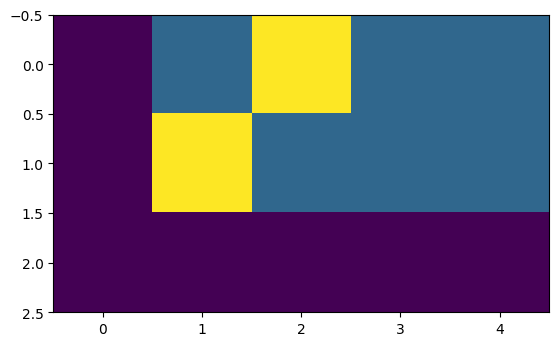

In [181]:
#如何使用LabelSmoothing
from pyitcast.transformer_utils import LabelSmoothing

# 使用LabelSmoothing实例化一个crit对象.
# 第一个参数size代表目标数据的词汇总数, 也是模型最后一层得到张量的最后一维大小
# 这里是5说明目标词汇总数是5个. 第二个参数padding_idx表示要将那些tensor中的数字
# 替换成0, 一般padding_idx=0表示不进行替换. 第三个参数smoothing, 表示标签的平滑程度
# 如原来标签的表示值为1, 则平滑后它的值域变为[1-smoothing, 1+smoothing].
crit = LabelSmoothing(size=5, padding_idx=0, smoothing=0.5)

# 假定一个任意的模型最后输出预测结果和真实结果
predict = torch.FloatTensor([[0, 0.2, 0.7, 0.1, 0],
                             [0, 0.2, 0.7, 0.1, 0],
                             [0, 0.2, 0.7, 0.1, 0]])

# 标签的表示值是0，1，2
target = torch.LongTensor([2, 1, 0])

# 将predict, target传入到对象中
crit(predict, target)

# 绘制标签平滑图像
plt.imshow(crit.true_dist)

In [190]:
#每个transformer部件单独检查输入，输出，维度是否存在错误
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import time

def check_transformer_model():
    """
    创建一个小型Transformer模型实例，
    用随机数据测试前向传播，
    并检查模型结构是否存在问题
    """
    print("开始检查Transformer模型结构...")

    # 设置小型模型参数用于测试
    vocab_size = 1000  # 词汇表大小
    d_model = 128      # 模型维度
    d_ff = 512         # 前馈网络维度
    n_heads = 4        # 注意力头数
    n_layers = 2       # 编码器/解码器层数
    dropout = 0.1      # dropout率
    batch_size = 2     # 批次大小
    seq_length = 5     # 序列长度

    try:
        # 创建模型
        print("1. 创建模型实例...")
        model = make_model(
            source_vocab=vocab_size,
            target_vocab=vocab_size,
            N=n_layers,
            d_model=d_model,
            d_ff=d_ff,
            head=n_heads,
            dropout=dropout
        )

        # 检查模型总参数量
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

        print(f"模型总参数量: {total_params:,}")
        print(f"可训练参数量: {trainable_params:,}")

        # 创建随机输入数据
        print("2. 创建测试数据...")
        src = torch.randint(1, vocab_size, (batch_size, seq_length))
        tgt = torch.randint(1, vocab_size, (batch_size, seq_length))

        # 创建掩码
        src_mask = torch.ones(batch_size, 1, seq_length)
        tgt_mask = torch.ones(batch_size, seq_length, seq_length)
        tgt_mask = torch.tril(tgt_mask)  # 下三角掩码，确保解码器只能看到过去的token

        # 尝试前向传播
        print("3. 测试前向传播中...")
        start_time = time.time()
        model.eval()  # 设置为评估模式
        with torch.no_grad():
            # 前向传播
            output = model(src, tgt, src_mask, tgt_mask)

            # 获取预测结果
            if hasattr(model, 'generator'):
                logits = model.generator(output)
                predictions = logits.argmax(dim=-1)
            else:
                logits = output
                predictions = output.argmax(dim=-1) if output.dim() > 2 else output

        elapsed_time = time.time() - start_time

        # 检查输出形状
        print(f"4. 输出检查:")
        print(f"   输入形状 - src: {src.shape}, tgt: {tgt.shape}")
        print(f"   输出形状 - output: {output.shape}")
        if hasattr(model, 'generator'):
            print(f"   生成器输出形状 - logits: {logits.shape}")
        print(f"   预测形状 - predictions: {predictions.shape}")
        print(f"   前向传播耗时: {elapsed_time:.4f}秒")

        # 打印模型架构摘要
        print("\n5. 模型架构摘要:")
        print_model_summary(model)

        print("\n✅ 模型检查完成，没有发现错误!")
        return True

    except Exception as e:
        print(f"\n❌ 模型检查失败! 错误: {str(e)}")
        import traceback
        traceback.print_exc()
        return False

def print_model_summary(model):
    """打印模型架构的摘要信息"""
    # 按模块类型统计参数
    module_params = {}

    for name, module in model.named_modules():
        if len(list(module.children())) == 0:  # 只统计叶子模块
            module_type = module.__class__.__name__
            params = sum(p.numel() for p in module.parameters() if p.requires_grad)

            if module_type not in module_params:
                module_params[module_type] = {'count': 0, 'params': 0}

            module_params[module_type]['count'] += 1
            module_params[module_type]['params'] += params

    # 打印摘要
    print("模块类型统计:")
    for module_type, stats in module_params.items():
        print(f"   {module_type}: {stats['count']}个实例, {stats['params']:,}参数")

    # 检查编码器和解码器
    if hasattr(model, 'encoder') and hasattr(model, 'decoder'):
        encoder_layers = len(model.encoder.layers) if hasattr(model.encoder, 'layers') else 0
        decoder_layers = len(model.decoder.layers) if hasattr(model.decoder, 'layers') else 0

        print(f"\n编码器层数: {encoder_layers}")
        print(f"解码器层数: {decoder_layers}")

    # 检查注意力头
    for name, module in model.named_modules():
        if isinstance(module, MultiHeadAttention):
            print(f"\n注意力头数: {module.num_heads}")
            print(f"每个头的维度: {module.d_k}")
            break

def test_sequence_generation(model, test_input, max_len=10):
    """测试模型的序列生成能力"""
    print("\n6. 测试序列生成:")

    # 准备测试输入
    src = test_input
    src_mask = torch.ones(1, 1, src.size(1))

    # 开始标记
    start_symbol = 1

    # 初始化输出序列
    ys = torch.ones(1, 1).fill_(start_symbol).type_as(src.data)

    # 自回归生成
    for i in range(max_len-1):
        # 解码器掩码
        tgt_mask = torch.tril(torch.ones(1, ys.size(1), ys.size(1)))

        # 前向传播
        with torch.no_grad():
            out = model.decode(model.encode(src, src_mask), src_mask,
                              Variable(ys), Variable(tgt_mask))
            prob = model.generator(out[:, -1])
            _, next_word = torch.max(prob, dim=1)
            next_word = next_word.data[0]

        # 将新预测添加到输出序列
        ys = torch.cat([ys, torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=1)

    print(f"   输入序列: {src.squeeze().tolist()}")
    print(f"   生成序列: {ys.squeeze().tolist()}")

# 执行检查
if __name__ == "__main__":
    success = check_transformer_model()

    if success:
        # 如果基本检查通过，测试序列生成能力
        vocab_size = 1000
        model = make_model(vocab_size, vocab_size, N=2)
        test_seq = torch.LongTensor([[1, 2, 3, 4, 5]])
        test_sequence_generation(model, test_seq)

开始检查Transformer模型结构...
1. 创建模型实例...
模型总参数量: 1,311,208
可训练参数量: 1,311,208
2. 创建测试数据...
3. 测试前向传播中...
4. 输出检查:
   输入形状 - src: torch.Size([2, 5]), tgt: torch.Size([2, 5])
   输出形状 - output: torch.Size([2, 5, 128])
   生成器输出形状 - logits: torch.Size([2, 5, 1000])
   预测形状 - predictions: torch.Size([2, 5])
   前向传播耗时: 0.0081秒

5. 模型架构摘要:
模块类型统计:
   Linear: 33个实例, 1,052,136参数
   Dropout: 22个实例, 0参数
   LayerNorm: 12个实例, 3,072参数
   Embedding: 2个实例, 256,000参数

编码器层数: 2
解码器层数: 2

注意力头数: 4
每个头的维度: 32

✅ 模型检查完成，没有发现错误!

6. 测试序列生成:
   输入序列: [1, 2, 3, 4, 5]
   生成序列: [1, 793, 810, 653, 637, 265, 937, 607, 292, 185]


In [189]:
#简单的copy任务训练和评估transformer
import torch
import torch.nn as nn
import numpy as np

# 改进版手动训练 - 提高准确率
def data_generator(V, batch_size, num_batches):
    """数据生成器"""
    for i in range(num_batches):
        data = torch.randint(1, V, size=(batch_size, 8))
        data[:, 0] = 1
        yield Batch(data.clone(), data.clone())

def improved_training():
    """改进的训练 - 提高准确率"""
    print("=== 开始改进训练 ===")

    V = 11
    model = make_model(V, V, N=2)

    # 关键改进1：调整学习率和使用学习率调度
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # 稍微提高学习率
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    criterion = nn.CrossEntropyLoss(ignore_index=0)

    # 训练
    model.train()
    for epoch in range(20):  # 增加训练轮数
        print(f"Epoch {epoch+1}/20")
        epoch_loss = 0

        for i, batch in enumerate(data_generator(V, 8, 15)):  # 增加批次大小和数量
            optimizer.zero_grad()

            # 前向传播
            output = model(batch.src, batch.trg, batch.src_mask, batch.trg_mask)

            # 关键改进2：使用generator进行最终预测
            final_output = model.generator(output)

            # 计算损失
            output_flat = final_output.reshape(-1, final_output.size(-1))
            target_flat = batch.trg_y.reshape(-1)

            loss = criterion(output_flat, target_flat)

            # 反向传播
            loss.backward()

            # 梯度裁剪
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            optimizer.step()
            epoch_loss += loss.item()

        # 学习率调度
        scheduler.step()

        avg_loss = epoch_loss / 15
        current_lr = scheduler.get_last_lr()[0]
        print(f"  平均Loss: {avg_loss:.4f}, 学习率: {current_lr:.6f}")

        # 关键改进3：更频繁的测试
        if (epoch + 1) % 2 == 0:
            accuracy = quick_test(model, V)
            if accuracy > 0.8:  # 如果准确率超过80%，可提前停止
                print(f"  🎉 达到高准确率 {accuracy:.2%}，提前完成训练！")
                break

    print("✅ 训练完成!")
    return model

def quick_test(model, V):
    """快速测试copy效果，返回准确率"""
    model.eval()
    total_correct = 0
    total_tokens = 0

    with torch.no_grad():
        for batch in data_generator(V, 4, 5):  # 多个测试样本
            output = model(batch.src, batch.trg, batch.src_mask, batch.trg_mask)
            final_output = model.generator(output)  # 关键：使用generator
            pred = final_output.argmax(dim=-1)

            # 计算准确率
            correct = (pred == batch.trg_y).sum().item()
            total = batch.trg_y.numel()

            total_correct += correct
            total_tokens += total

    accuracy = total_correct / total_tokens
    print(f"    快速测试准确率: {accuracy:.2%}")

    # 显示一个例子
    with torch.no_grad():
        for batch in data_generator(V, 1, 1):
            output = model(batch.src, batch.trg, batch.src_mask, batch.trg_mask)
            final_output = model.generator(output)
            pred = final_output.argmax(dim=-1)

            src = batch.src[0].tolist()[:6]
            tgt = batch.trg_y[0].tolist()[:6]
            pred_list = pred[0].tolist()[:6]

            print(f"    示例 - 输入:{src} -> 目标:{tgt} -> 预测:{pred_list}")
            break

    model.train()
    return accuracy

def comprehensive_evaluation():
    """全面评估"""
    print("\n=== 全面评估 ===")

    V = 11
    model.eval()
    criterion = nn.CrossEntropyLoss(ignore_index=0)

    total_loss = 0
    total_correct = 0
    total_tokens = 0
    perfect_copies = 0
    total_sequences = 0

    with torch.no_grad():
        for i, batch in enumerate(data_generator(V, 8, 10)):
            output = model(batch.src, batch.trg, batch.src_mask, batch.trg_mask)
            final_output = model.generator(output)  # 使用generator

            # 计算损失
            output_flat = final_output.reshape(-1, final_output.size(-1))
            target_flat = batch.trg_y.reshape(-1)
            loss = criterion(output_flat, target_flat)
            total_loss += loss.item()

            # 计算Token级准确率
            pred = final_output.argmax(dim=-1)
            correct = (pred == batch.trg_y).sum().item()
            total_correct += correct
            total_tokens += batch.trg_y.numel()

            # 计算序列级准确率（完美复制）
            for j in range(batch.src.size(0)):
                if torch.equal(pred[j], batch.trg_y[j]):
                    perfect_copies += 1
                total_sequences += 1

    token_accuracy = total_correct / total_tokens
    sequence_accuracy = perfect_copies / total_sequences
    avg_loss = total_loss / 10

    print(f"  评估Loss: {avg_loss:.4f}")
    print(f"  Token准确率: {token_accuracy:.2%}")
    print(f"  序列准确率: {sequence_accuracy:.2%} ({perfect_copies}/{total_sequences})")
    print("✅ 评估完成!")

    return token_accuracy, sequence_accuracy

def show_detailed_examples():
    """显示详细的copy示例"""
    print("\n=== 详细Copy示例 ===")

    V = 11
    model.eval()

    with torch.no_grad():
        for i, batch in enumerate(data_generator(V, 3, 1)):
            output = model(batch.src, batch.trg, batch.src_mask, batch.trg_mask)
            final_output = model.generator(output)
            pred = final_output.argmax(dim=-1)

            for j in range(min(3, batch.src.size(0))):
                src_seq = batch.src[j].tolist()
                tgt_seq = batch.trg_y[j].tolist()
                pred_seq = pred[j].tolist()

                print(f"  样本{j+1}:")
                print(f"    输入: {src_seq}")
                print(f"    目标: {tgt_seq}")
                print(f"    预测: {pred_seq}")

                correct = sum(1 for a, b in zip(tgt_seq, pred_seq) if a == b)
                accuracy = correct / len(tgt_seq)
                print(f"    准确率: {accuracy:.2%} ({correct}/{len(tgt_seq)})")

                if tgt_seq == pred_seq:
                    print("    ✅ 完美复制!")
                else:
                    print("    ❌ 复制不完整")
                print()

if __name__ == '__main__':
    # 执行改进的训练流程
    print("🚀 开始改进的Copy任务训练")
    model = improved_training()

    print("\n" + "="*50)
    token_acc, seq_acc = comprehensive_evaluation()

    print("\n" + "="*50)
    show_detailed_examples()

    print(f"\n🎯 最终结果:")
    print(f"   Token准确率: {token_acc:.2%}")
    print(f"   序列准确率: {seq_acc:.2%}")

    if seq_acc > 0.5:
        print("🎉 恭喜！模型已经学会了Copy任务！")
    else:
        print("🔄 模型还需要更多训练来完全掌握Copy任务")

🚀 开始改进的Copy任务训练
=== 开始改进训练 ===
Epoch 1/20
  平均Loss: 5.0268, 学习率: 0.001000
Epoch 2/20
  平均Loss: 2.4478, 学习率: 0.001000
    快速测试准确率: 15.00%
    示例 - 输入:[1, 5, 8, 6, 1, 3] -> 目标:[5, 8, 6, 1, 3, 7] -> 预测:[10, 10, 10, 8, 10, 8]
Epoch 3/20
  平均Loss: 2.1909, 学习率: 0.001000
Epoch 4/20
  平均Loss: 2.0787, 学习率: 0.001000
    快速测试准确率: 20.00%
    示例 - 输入:[1, 6, 3, 2, 9, 7] -> 目标:[6, 3, 2, 9, 7, 2] -> 预测:[6, 4, 6, 7, 7, 2]
Epoch 5/20
  平均Loss: 2.1712, 学习率: 0.000500
Epoch 6/20
  平均Loss: 1.9871, 学习率: 0.000500
    快速测试准确率: 23.57%
    示例 - 输入:[1, 6, 4, 5, 1, 2] -> 目标:[6, 4, 5, 1, 2, 4] -> 预测:[4, 4, 6, 4, 2, 4]
Epoch 7/20
  平均Loss: 1.9403, 学习率: 0.000500
Epoch 8/20
  平均Loss: 1.9278, 学习率: 0.000500
    快速测试准确率: 22.86%
    示例 - 输入:[1, 6, 9, 8, 8, 9] -> 目标:[6, 9, 8, 8, 9, 10] -> 预测:[4, 4, 4, 4, 4, 4]
Epoch 9/20
  平均Loss: 1.8962, 学习率: 0.000500
Epoch 10/20
  平均Loss: 1.8888, 学习率: 0.000250
    快速测试准确率: 22.86%
    示例 - 输入:[1, 3, 4, 10, 9, 7] -> 目标:[3, 4, 10, 9, 7, 4] -> 预测:[9, 9, 9, 9, 7, 9]
Epoch 11/20
  平均Loss: 1.86

In [ ]:
#